In [10]:
import os
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.mask import mask
import earthpy.spatial as es
import earthpy as et

import common_functions as common
import naip_data_process as naip

# set working dir
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

## Analysis
Some text here

### NAIP Processing
Some text here

In [8]:
# Open 2011 mosaic file
mosaic_2011_fp = "data/final-project/cottonwood-heights-utah/naip/outputs/naip_2011_mosaic_crop.tif"
with rio.open(mosaic_2011_fp) as mosaic_2011_src:
    mosaic_2011_scene = mosaic_2011_src.read()
    mosaic_2011_scene_meta = mosaic_2011_src.meta
    mosaic_2011_scene_bds = mosaic_2011_src.bounds
    study_area_box_reprojected = common.study_area_box_gdf.to_crs(mosaic_2011_src.crs)
    masked_mosaic_2011, masked_mosaic_2011_affine = mask(mosaic_2011_src, study_area_box_reprojected.geometry, crop=True)

In [9]:
# Open 2014 mosaic file
mosaic_2014_fp = "data/final-project/cottonwood-heights-utah/naip/outputs/naip_2014_mosaic_crop.tif"
with rio.open(mosaic_2014_fp) as mosaic_2014_src:
    mosaic_2014_scene = mosaic_2014_src.read()
    mosaic_2014_scene_meta = mosaic_2014_src.meta
    mosaic_2014_scene_bds = mosaic_2014_src.bounds
    study_area_box_reprojected = common.study_area_box_gdf.to_crs(mosaic_2014_src.crs)
    masked_mosaic_2014, masked_mosaic_2014_affine = mask(mosaic_2014_src, study_area_box_reprojected.geometry, crop=True)

In [11]:
# Convert the data to int to avoid the divide by zero error
mosaic_2011_scene = mosaic_2011_scene.astype(int)
mosaic_2014_scene = mosaic_2014_scene.astype(int)
# Compute NDVI
ndvi_2011_mosaic = es.normalized_diff(b2=mosaic_2011_scene[3], b1=mosaic_2011_scene[2])
ndvi_2014_mosaic = es.normalized_diff(b2=mosaic_2014_scene[3], b1=mosaic_2014_scene[2])

C:\Users\windnage\Anaconda3\envs\earth-analytics-python\lib\site-packages\earthpy\spatial.py:75: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b2 - b1) / (b2 + b1)


In [12]:
# Compute average NAIP 2011 NDVI within avalanche paths and outside avi paths
avalanche_overlap_shape = common.generate_unioned_avalanche_overlay(mosaic_2011_src.crs)
merged_results_ndvi_2011 = common.rasterstats_grouped_by_height(avalanche_overlap_shape,
                                                                ndvi_2011_mosaic,
                                                                masked_mosaic_2011_affine,
                                                                "mean")

C:\Users\windnage\Anaconda3\envs\earth-analytics-python\lib\site-packages\rasterstats\io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\Users\windnage\Anaconda3\envs\earth-analytics-python\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


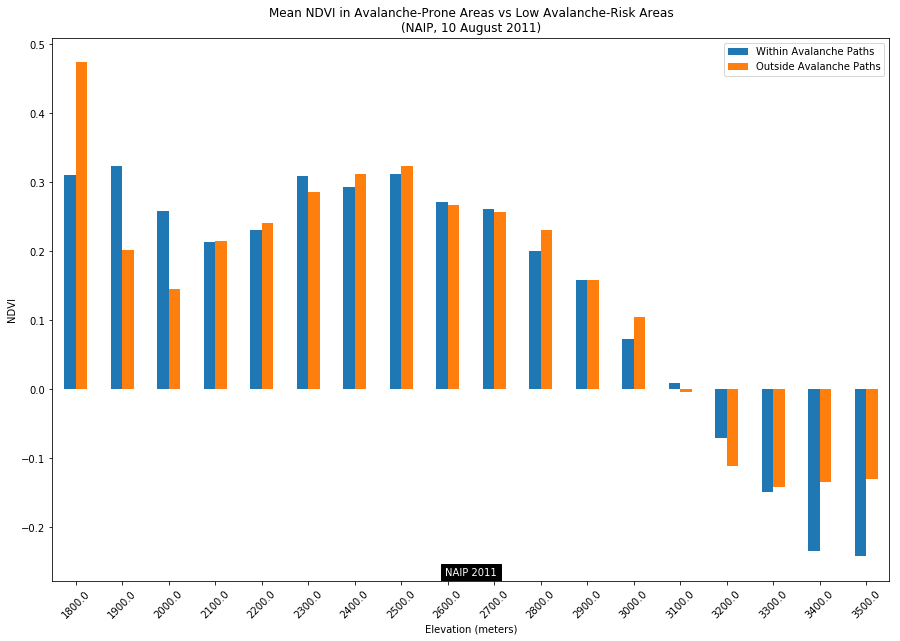

In [13]:
# Plot the average NAIP 2011 NDVI within and outside the avi paths
common.plot_bar(merged_results_ndvi_2011[merged_results_ndvi_2011['height_bucket'] != 0],
                "height_bucket",
                "Elevation (meters)",
                ['mean_avalanche', 'mean_no_avalanche'],
                "NDVI",
                "Mean NDVI in Avalanche-Prone Areas vs Low Avalanche-Risk Areas\n" +
                "(NAIP, 10 August 2011)",
                "NAIP 2011", series_names=['Within Avalanche Paths', 'Outside Avalanche Paths'])

In [14]:
# Compute average NAIP 2014 NDVI within avalanche paths and outside avi paths
avalanche_overlap_shape = common.generate_unioned_avalanche_overlay(mosaic_2014_src.crs)
merged_results_ndvi_2014 = common.rasterstats_grouped_by_height(avalanche_overlap_shape,
                                                                ndvi_2014_mosaic,
                                                                masked_mosaic_2014_affine,
                                                                "mean")

C:\Users\windnage\Anaconda3\envs\earth-analytics-python\lib\site-packages\rasterstats\io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")
C:\Users\windnage\Anaconda3\envs\earth-analytics-python\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


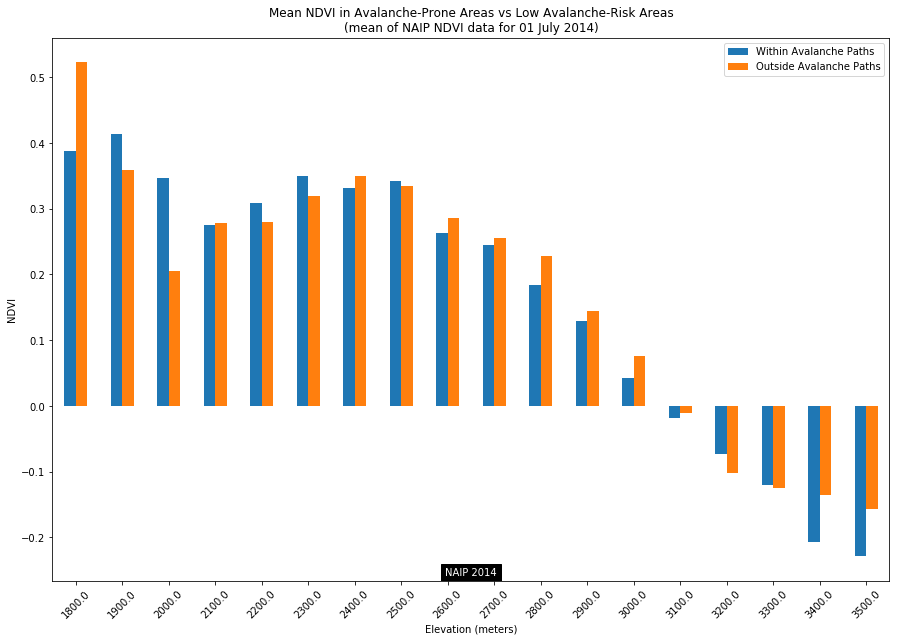

In [15]:
# Plot the average NAIP 2014 NDVI within and outside the avi paths
common.plot_bar(merged_results_ndvi_2014[merged_results_ndvi_2014['height_bucket'] != 0],
                "height_bucket",
                "Elevation (meters)",
                ['mean_avalanche', 'mean_no_avalanche'],
                "NDVI",
                "Mean NDVI in Avalanche-Prone Areas vs Low Avalanche-Risk Areas\n" +
                "(mean of NAIP NDVI data for 01 July 2014)",
                "NAIP 2014", series_names=['Within Avalanche Paths', 'Outside Avalanche Paths'])